<a href="https://colab.research.google.com/github/joaoaugustotemporin/kmeans/blob/master/Atividade_Macro_Relat%C3%B3rio_1%2C2_e_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 1

## Baixando as Bibliotecas Necessárias

In [3]:
import pandas as pd
import plotly as plot
import plotly.express as px
import math
import numpy
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Abrindo a base de dados

In [4]:
base = pd.read_csv('brazil.csv')
base

,Country Name,Country Code,Series Name,Series Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Brazil,BRA,GDP (constant LCU),NY.GDP.MKTP.KN,787141730605.365,876050072657.491,981638655526.22,1118858896310,1220027463848.95,1283579620455.64,1409247330047.37,1474161744337.44,1521802370408.23,1624771855399.15,1772804171757.01,1694918552029.04,1704753241560.85,1646624676787.14,1733387688146.47,1871120277415.79,2020590886942.69,2093324671912.73,2091175398567.48,2159754635411.37,2.092751e+12,2.124392e+12,2.114473e+12,2.213117e+12,2.331177e+12,2.434139e+12,2.487873e+12,2.572333e+12,2.581030e+12,2.593107e+12,2.706892e+12,2.744515e+12,2.828317e+12,2.860584e+12,3.025352e+12,3.122228e+12,3.245930e+12,3.442954e+12,3.618345e+12,3.613793e+12,3.885847e+12,4.040287e+12,4.117907e+12,4.241644e+12,4.263020e+12,4.111863e+12,3.977162e+12,4.029775e+12,4.082856e+12,4.129261e+12
1,Brazil,BRA,GDP (current LCU),NY.GDP.MKTP.CN,0.0706600025,0.0945689976,0.1262540072,0.1765179932,0.2594619989,0.3654139936,0.5922639966,0.9056490064,1.3187919855,2.2032859325,4.5029067993,8.9207258225,18.3785591126,42.6392593384,140.3969726563,502.7359924316,1331.5694580078,4195.1098632813,31477.69921875,425595.31,1.154879e+07,6.028600e+07,6.409588e+08,1.409711e+10,3.568010e+11,7.059916e+11,8.547636e+11,9.520892e+11,1.002351e+12,1.087710e+12,1.199092e+12,1.315755e+12,1.488787e+12,1.717950e+12,1.957751e+12,2.170585e+12,2.409450e+12,2.720263e+12,3.109803e+12,3.333039e+12,3.885847e+12,4.376381e+12,4.814760e+12,5.331619e+12,5.778953e+12,5.995787e+12,6.269328e+12,6.583319e+12,6.889176e+12,7.256926e+12
2,Brazil,BRA,Gross capital formation (current LCU),NE.GDI.TOTL.CN,0.0145150004,0.019971,0.0267290007,0.0410300009,0.0658740029,0.0980729982,0.1369089931,0.1998690069,0.3029690087,0.5015659928,1.0512700081,2.0592710972,3.8767299652,7.1131000519,22.0992698669,96.5290985107,254.2380065918,935.7050170898,7151.2700195313,114497,2.329000e+06,1.191800e+07,1.213630e+08,2.938735e+09,8.204100e+10,1.220825e+11,1.475916e+11,1.691290e+11,1.820746e+11,1.891481e+11,2.266658e+11,2.465971e+11,2.597797e+11,2.895895e+11,3.506835e+11,3.734465e+11,4.292790e+11,5.391378e+11,6.723202e+11,6.264826e+11,8.471660e+11,9.552010e+11,1.031188e+12,1.156629e+12,1.187483e+12,1.043965e+12,9.384900e+11,9.631650e+11,1.021622e+12,1.096737e+12
3,Brazil,BRA,"Labor force, total",SL.TLF.TOTL.IN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,5.992008e+07,6.147310e+07,6.339787e+07,6.535245e+07,6.737643e+07,6.948473e+07,6.962696e+07,7.207277e+07,7.404348e+07,7.647467e+07,7.849281e+07,8.042946e+07,8.298683e+07,8.468725e+07,8.724965e+07,8.972516e+07,9.082147e+07,9.196382e+07,9.348654e+07,9.533340e+07,9.523196e+07,9.505271e+07,9.759780e+07,9.890378e+07,9.993283e+07,1.016009e+08,1.025090e+08,1.042607e+08,1.055422e+08,1.065008e+08
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Limpando a base de dados

In [5]:
#Retira as colunas dentro da lista
base = base.drop(['Country Code','Series Code','Country Name'],axis=1)

#Exclui valores NaN
base.dropna(inplace=True)
base

,Series Name,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,GDP (constant LCU),787141730605.365,876050072657.491,981638655526.22,1118858896310,1220027463848.95,1283579620455.64,1409247330047.37,1474161744337.44,1521802370408.23,1624771855399.15,1772804171757.01,1694918552029.04,1704753241560.85,1646624676787.14,1733387688146.47,1871120277415.79,2020590886942.69,2093324671912.73,2091175398567.48,2159754635411.37,2.092751e+12,2.124392e+12,2.114473e+12,2.213117e+12,2.331177e+12,2.434139e+12,2.487873e+12,2.572333e+12,2.581030e+12,2.593107e+12,2.706892e+12,2.744515e+12,2.828317e+12,2.860584e+12,3.025352e+12,3.122228e+12,3.245930e+12,3.442954e+12,3.618345e+12,3.613793e+12,3.885847e+12,4.040287e+12,4.117907e+12,4.241644e+12,4.263020e+12,4.111863e+12,3.977162e+12,4.029775e+12,4.082856e+12,4.129261e+12
1,GDP (current LCU),0.0706600025,0.0945689976,0.1262540072,0.1765179932,0.2594619989,0.3654139936,0.5922639966,0.9056490064,1.3187919855,2.2032859325,4.5029067993,8.9207258225,18.3785591126,42.6392593384,140.3969726563,502.7359924316,1331.5694580078,4195.1098632813,31477.69921875,425595.31,1.154879e+07,6.028600e+07,6.409588e+08,1.409711e+10,3.568010e+11,7.059916e+11,8.547636e+11,9.520892e+11,1.002351e+12,1.087710e+12,1.199092e+12,1.315755e+12,1.488787e+12,1.717950e+12,1.957751e+12,2.170585e+12,2.409450e+12,2.720263e+12,3.109803e+12,3.333039e+12,3.885847e+12,4.376381e+12,4.814760e+12,5.331619e+12,5.778953e+12,5.995787e+12,6.269328e+12,6.583319e+12,6.889176e+12,7.256926e+12
2,Gross capital formation (current LCU),0.0145150004,0.019971,0.0267290007,0.0410300009,0.0658740029,0.0980729982,0.1369089931,0.1998690069,0.3029690087,0.5015659928,1.0512700081,2.0592710972,3.8767299652,7.1131000519,22.0992698669,96.5290985107,254.2380065918,935.7050170898,7151.2700195313,114497,2.329000e+06,1.191800e+07,1.213630e+08,2.938735e+09,8.204100e+10,1.220825e+11,1.475916e+11,1.691290e+11,1.820746e+11,1.891481e+11,2.266658e+11,2.465971e+11,2.597797e+11,2.895895e+11,3.506835e+11,3.734465e+11,4.292790e+11,5.391378e+11,6.723202e+11,6.264826e+11,8.471660e+11,9.552010e+11,1.031188e+12,1.156629e+12,1.187483e+12,1.043965e+12,9.384900e+11,9.631650e+11,1.021622e+12,1.096737e+12
3,"Labor force, total",..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,5.992008e+07,6.147310e+07,6.339787e+07,6.535245e+07,6.737643e+07,6.948473e+07,6.962696e+07,7.207277e+07,7.404348e+07,7.647467e+07,7.849281e+07,8.042946e+07,8.298683e+07,8.468725e+07,8.724965e+07,8.972516e+07,9.082147e+07,9.196382e+07,9.348654e+07,9.533340e+07,9.523196e+07,9.505271e+07,9.759780e+07,9.890378e+07,9.993283e+07,1.016009e+08,1.025090e+08,1.042607e+08,1.055422e+08,1.065008e+08


In [6]:
#Renomeia as colunas de XXXX [YRXXXX] P/ XXXX
columns = {}

for i in range(1,len(base.columns)):
    if str(base.columns[i]) not in columns.keys():
        columns[str(base.columns[i])] = str(base.columns[i][0:4])
        
        
        
base.rename(columns=columns,inplace=True)

In [7]:
#Dataframe Transposto

base = base.T
base

,0,1,2,3
Series Name,GDP (constant LCU),GDP (current LCU),Gross capital formation (current LCU),"Labor force, total"
1970,787141730605.365,0.0706600025,0.0145150004,..
1971,876050072657.491,0.0945689976,0.019971,..
1972,981638655526.22,0.1262540072,0.0267290007,..
1973,1118858896310,0.1765179932,0.0410300009,..
1974,1220027463848.95,0.2594619989,0.0658740029,..
1975,1283579620455.64,0.3654139936,0.0980729982,..
1976,1409247330047.37,0.5922639966,0.1369089931,..
1977,1474161744337.44,0.9056490064,0.1998690069,..
1978,1521802370408.23,1.3187919855,0.3029690087,..


In [8]:
#Renomeia as colunas
base.rename(columns={0:'GDP Const.',1:'GDP Corr.',2:'GKF',3:'Labor Force'},inplace=True)

#Exclui a primeira linha
base = base[1:len(base)]

In [9]:
#Transforma qualquer valor não numérico em NaN
for i in base.index:
    
    for j in base.columns:
    
        if base.loc[str(i),str(j)] == '..' :
        
            base.loc[str(i),str(j)] = 'NaN'
        
        
        else:
        
            pass


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
#Transforma os dados em float

for i in base.columns:
    
    base[i] = base[i].astype(float)
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Cálculos

In [11]:
#Cria a coluna do deflator
base['Deflator'] = ( base['GDP Corr.'] / base['GDP Const.'] )*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
#Cria uma nova coluna do deflator a preços de 2019
base['Deflator 2019'] = base['Deflator'] / base.loc['2019','Deflator']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
#Cria uma nova coluna do GDP a preços de 2019
base['GDP 2019'] = base['GDP Corr.'] / base['Deflator 2019']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
#Cria uma nova coluna do GKF a preços de 2019
base['GKF 2019'] = base['GKF'] / base['Deflator 2019']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
base

,GDP Const.,GDP Corr.,GKF,Labor Force,Deflator,Deflator 2019,GDP 2019,GKF 2019
1970,7.871417e+11,7.066000e-02,1.451500e-02,NaN,8.976783e-12,5.107876e-14,1.383354e+12,2.841690e+11
1971,8.760501e+11,9.456900e-02,1.997100e-02,NaN,1.079493e-11,6.142420e-14,1.539605e+12,3.251324e+11
1972,9.816387e+11,1.262540e-01,2.672900e-02,NaN,1.286156e-11,7.318350e-14,1.725170e+12,3.652326e+11
1973,1.118859e+12,1.765180e-01,4.103000e-02,NaN,1.577661e-11,8.977043e-14,1.966327e+12,4.570547e+11
1974,1.220027e+12,2.594620e-01,6.587400e-02,NaN,2.126690e-11,1.210107e-13,2.144124e+12,5.443651e+11
1975,1.283580e+12,3.654140e-01,9.807300e-02,NaN,2.846835e-11,1.619877e-13,2.255813e+12,6.054349e+11
1976,1.409247e+12,5.922640e-01,1.369090e-01,NaN,4.202697e-11,2.391376e-13,2.476667e+12,5.725115e+11
1977,1.474162e+12,9.056490e-01,1.998690e-01,NaN,6.143485e-11,3.495702e-13,2.590750e+12,5.717564e+11
1978,1.521802e+12,1.318792e+00,3.029690e-01,NaN,8.665987e-11,4.931031e-13,2.674475e+12,6.144131e+11
1979,1.624772e+12,2.203286e+00,5.015660e-01,NaN,1.356059e-10,7.716105e-13,2.855438e+12,6.500248e+11


### Definir o parâmetro d

In [16]:
#Define o parâmetro d
d = 0.06

#Calcula o g^k
gk = (math.log(base.loc['2019','GKF 2019']) - math.log(base.loc['1970','GKF 2019']))/len(base)

In [17]:
print('O parâmetro d é: ' + str(d))
print('O parâmetro g^k é: ' + str(round(gk,5)))

O parâmetro d é: 0.06
O parâmetro g^k é: 0.02701


In [18]:
#Calcula o Kc
base.loc['1970','kc'] = base.loc['1970','GKF 2019'] / (d+gk)

for i in base.index:
    if i == '1970':
        pass
    
    else:       
        base.loc[str(i),'kc'] = base.loc[str(int(i)-1),'kc'] * (1-d) + base.loc[str(int(i)-1),'GKF 2019']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:850: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/i

# PTF

In [19]:
#Cria a base de dados PTF
baseptf = pd.DataFrame()

#Seleciona na base os valores de Y de 1990 em diante
baseptf['Y'] = base.loc['1990':,'GDP 2019']
baseptf['K'] = base.loc['1990':,'kc']
baseptf['L'] = base.loc['1990':,'Labor Force']

In [20]:
#Calcula as taxas de Y,K e L

for i in baseptf.index:
    if i == '1990':
        pass  
    
    else:      
        
        
        baseptf.loc[str(int(i)),'tx_Y'] = (baseptf.loc[str(int(i)),'Y'] - baseptf.loc[str(int(i)-1),'Y']) / baseptf.loc[str(int(i)),'Y'] 
        baseptf.loc[str(int(i)),'tx_K'] = (baseptf.loc[str(int(i)),'K'] - baseptf.loc[str(int(i)-1),'K']) / baseptf.loc[str(int(i)),'K'] 
        baseptf.loc[str(int(i)),'tx_L'] = (baseptf.loc[str(int(i)),'L'] - baseptf.loc[str(int(i)-1),'L']) / baseptf.loc[str(int(i)),'L'] 
        

In [21]:
baseptf

,Y,K,L,tx_Y,tx_K,tx_L
1990,3.677883e+12,8.616336e+12,59920078.0,NaN,NaN,NaN
1991,3.733491e+12,8.841060e+12,61473096.0,0.014894,0.025418,0.025263
1992,3.716059e+12,9.048674e+12,63397868.0,-0.004691,0.022944,0.030360
1993,3.889419e+12,9.209374e+12,65352451.0,0.044572,0.017450,0.029908
1994,4.096902e+12,9.467614e+12,67376427.0,0.050644,0.027276,0.030040
1995,4.277851e+12,9.841578e+12,69484734.0,0.042299,0.037998,0.030342
1996,4.372286e+12,9.990824e+12,69626959.0,0.021599,0.014938,0.002043
1997,4.520719e+12,1.014634e+13,72072769.0,0.032834,0.015327,0.033935
1998,4.536003e+12,1.034061e+13,74043475.0,0.003370,0.018788,0.026616
1999,4.557229e+12,1.054413e+13,76474668.0,0.004658,0.019301,0.031791


## Define o parâmetro alpha

In [22]:
alpha = 0.690000000000000

In [23]:
#Calcula a PTF

for i in baseptf.index:
    if i != '2019':
        baseptf.loc[str(int(i)),'ptf'] = baseptf.loc[str(int(i)+1),'tx_Y'] - alpha*baseptf.loc[str(int(i)+1),'tx_K'] - (1-alpha) * baseptf.loc[str(int(i)+1),'tx_L']
    
    else:
        
        baseptf.loc['2019','ptf'] = 0.00

In [24]:
#Calcula o Beta

for i in baseptf.index:

    baseptf.loc[str(i),'B'] = baseptf.loc[str(i),'Y'] / ((baseptf.loc[str(i),'K'] ** alpha) * (baseptf.loc[str(i),'L']**(1-alpha)))

In [25]:
#Calcula o Beta médio
b_mean = baseptf['B'].mean()

In [26]:
print('O β é: ' + str(round(b_mean,5)))

O β é: 17.78303


In [27]:
#Calcula o Y_prev

for i in baseptf.index:

    baseptf.loc[str(i),'Y prev'] = b_mean * baseptf.loc[str(i),'K']**alpha * baseptf.loc[str(i),'L']**(1-alpha)

baseptf = baseptf

In [28]:
#Plota o gráfico Y e Y_prev
fig = go.Figure()
fig.add_trace(go.Scatter(x=baseptf.index, y=baseptf['Y'],
                    mode='lines',
                    name='Y'))
fig.add_trace(go.Scatter(x=baseptf.index, y=baseptf['Y prev'],
                    mode='lines',
                    name='Y prev'))
fig.update_layout(xaxis_title='Tempo',yaxis_title='Valor de Y',title='Gráfico Y e Y_prev 1990 - 2019')
fig.show()

In [29]:
#Plota o gráfico Y e Y_prev
fig = go.Figure()
fig.add_trace(go.Scatter(x=baseptf.index, y=baseptf['ptf'],
                    mode='lines',
                    name='PTF'))
fig.add_trace(go.Scatter(x=baseptf.index, y=baseptf['tx_Y'],
                    mode='lines',
                    name='tx_Y'))
fig.update_layout(xaxis_title='Tempo',yaxis_title='Variação',title='PTF x Tx_Y')
fig.show()

### Otimizar alpha

In [30]:
#Cria a diferença quadrática entre o Y e o Y_prev
baseptf['Y diff Quad.'] = (baseptf['Y'] - baseptf['Y prev']) ** 2

In [31]:
#Média do Erro Quadrático
baseptf['Y diff Quad.'].mean()

1.107546962097232e+23

In [32]:
#Cria a função ptf que calcula automiticamente a PTF dado o valor de alpha, utiliza a mesma baseptf e retorna o erro quadrático

def ptf(alpha):
    
    for i in baseptf.index:
        
        if i != '2019':
            baseptf.loc[str(int(i)),'ptf'] = baseptf.loc[str(int(i)+1),'tx_Y'] - alpha*baseptf.loc[str(int(i)+1),'tx_K'] - (1-alpha) * baseptf.loc[str(int(i)+1),'tx_L']
    
        else:
        
            baseptf.loc['2019','ptf'] = 0.00
    
    for i in baseptf.index:

        baseptf.loc[str(i),'B'] = baseptf.loc[str(i),'Y'] / ((baseptf.loc[str(i),'K'] ** alpha) * (baseptf.loc[str(i),'L']**(1-alpha)))
  
    b_mean = baseptf['B'].mean()
    
    for i in baseptf.index:

        baseptf.loc[str(i),'Y prev'] = b_mean * baseptf.loc[str(i),'K']**alpha * baseptf.loc[str(i),'L']**(1-alpha)
    
    baseptf['Y diff Quad.'] = (baseptf['Y'] - baseptf['Y prev']) ** 2
    
    return baseptf['Y diff Quad.'].mean()

In [58]:
ptf(0.8)

1.138666922392597e+23

In [34]:
#Calcula o erro quadrático médio com 100 valores de alpha entre 0 a 1 

teste = numpy.arange(0, 1, 0.01)
resultado = pd.DataFrame(columns=['Erro'])

for i in teste:
    

    resultado.loc[i,'Erro'] = ptf(i)
    


In [35]:
resultado

,Erro
0.00,2.28506e+23
0.01,2.25217e+23
0.02,2.21973e+23
0.03,2.18773e+23
0.04,2.15618e+23
...,...
0.95,1.28719e+23
0.96,1.30156e+23
0.97,1.31651e+23
0.98,1.33203e+23


In [36]:
resultado['Erro'].min()

1.1075469620972307e+23

In [37]:
resultado['Erro'].loc[lambda x: x==resultado['Erro'].min()].index

Float64Index([0.6900000000000001], dtype='float64')

## Função automática

In [38]:
def PTF(d,alpha,base):

    base = pd.read_csv(str(base))
    #Retira as colunas dentro da lista
    base = base.drop(['Country Code','Series Code','Country Name'],axis=1)

    #Exclui valores NaN
    base.dropna(inplace=True)
    
    #Renomeia as colunas de XXXX [YRXXXX] P/ XXXX
    columns = {}

    for i in range(1,len(base.columns)):
        if str(base.columns[i]) not in columns.keys():
            columns[str(base.columns[i])] = str(base.columns[i][0:4])
          
    base.rename(columns=columns,inplace=True)
    
    #Dataframe Transposto
    base = base.T
    
    #Renomeia as colunas
    base.rename(columns={0:'GDP Const.',1:'GDP Corr.',2:'GKF',3:'Labor Force'},inplace=True)

    #Exclui a primeira linha
    base = base[1:len(base)]
    
    #Transforma qualquer valor não numérico em NaN
    for i in base.index:
    
        for j in base.columns:
    
            if base.loc[str(i),str(j)] == '..' :
        
                base.loc[str(i),str(j)] = 'NaN'
        
        
            else:
        
                pass
    
    #Transforma os dados em float

    for i in base.columns:
    
        base[i] = base[i].astype(float)

        
    #Cria a coluna do deflator
    base['Deflator'] = ( base['GDP Corr.'] / base['GDP Const.'] )*100
    
    #Cria uma nova coluna do deflator a preços de 2019
    base['Deflator 2019'] = base['Deflator'] / base.loc['2019','Deflator']
    
    #Cria uma nova coluna do GDP a preços de 2019
    base['GDP 2019'] = base['GDP Corr.'] / base['Deflator 2019']
    
    #Cria uma nova coluna do GKF a preços de 2019
    base['GKF 2019'] = base['GKF'] / base['Deflator 2019']
    
    #Calcula o gk
    gk = (math.log(base.loc['2019','GKF 2019']) - math.log(base.loc['1970','GKF 2019']))/len(base)
    
    #Calcula o Kc
    base.loc['1970','kc'] = base.loc['1970','GKF 2019'] / (d+gk)

    for i in base.index:
        
        if i == '1970':
            pass
    
        else:       
            base.loc[str(i),'kc'] = base.loc[str(int(i)-1),'kc'] * (1-d) + base.loc[str(int(i)-1),'GKF 2019']
            
    #PTF
    
    #Cria a base de dados PTF
    baseptf = pd.DataFrame()

    #Seleciona na base os valores de Y de 1990 em diante
    baseptf['Y'] = base.loc['1990':,'GDP 2019']
    baseptf['K'] = base.loc['1990':,'kc']
    baseptf['L'] = base.loc['1990':,'Labor Force']
    
    
    #Calcula as taxas de Y,K e L

    for i in baseptf.index:
        if i == '1990':
            pass  
    
        else:      
        
        
            baseptf.loc[str(int(i)),'tx_Y'] = (baseptf.loc[str(int(i)),'Y'] - baseptf.loc[str(int(i)-1),'Y']) / baseptf.loc[str(int(i)),'Y'] 
            baseptf.loc[str(int(i)),'tx_K'] = (baseptf.loc[str(int(i)),'K'] - baseptf.loc[str(int(i)-1),'K']) / baseptf.loc[str(int(i)),'K'] 
            baseptf.loc[str(int(i)),'tx_L'] = (baseptf.loc[str(int(i)),'L'] - baseptf.loc[str(int(i)-1),'L']) / baseptf.loc[str(int(i)),'L'] 
    
    #Calcula a PTF

    for i in baseptf.index:
        if i != '2019':
            baseptf.loc[str(int(i)),'ptf'] = baseptf.loc[str(int(i)+1),'tx_Y'] - alpha*baseptf.loc[str(int(i)+1),'tx_K'] - (1-alpha) * baseptf.loc[str(int(i)+1),'tx_L']
    
        else:
        
            baseptf.loc['2019','ptf'] = 0.00
            
    #Calcula o Beta

    for i in baseptf.index:

        baseptf.loc[str(i),'B'] = baseptf.loc[str(i),'Y'] / ((baseptf.loc[str(i),'K'] ** alpha) * (baseptf.loc[str(i),'L']**(1-alpha)))
        
        
    #Calcula o Beta médio
    b_mean = baseptf['B'].mean()
    
    #Calcula o Y_prev

    for i in baseptf.index:

        baseptf.loc[str(i),'Y prev'] = b_mean * baseptf.loc[str(i),'K']**alpha * baseptf.loc[str(i),'L']**(1-alpha)

    baseptf = baseptf
    


    
    #Plota o gráfico Y e Y_prev
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=baseptf.index, y=baseptf['Y'],
                    mode='lines',
                    name='Y'))
    fig.add_trace(go.Scatter(x=baseptf.index, y=baseptf['Y prev'],
                    mode='lines',
                    name='Y prev'))
    fig.update_layout(xaxis_title='Tempo',yaxis_title='Valor de Y',title='Gráfico Y e Y_prev 1990 - 2019')   



    return fig.show()

In [61]:
PTF(0.06,0.69,'canada.csv')

# Relatório 2

## Instalando gapminder

In [40]:
!pip install gapminder

## Baixando Bibliotecas

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import  gapminder 
import plotly.express as px


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [42]:
#Carregando a base gapminder

df=gapminder

#Exibe os 5 primeiros elementos
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [43]:
#Cria uma base secundária com dados do Brazil, China e Eua, no ano de 2007

df2=df[((df['country']=='Brazil') | (df['country']=='China') | (df['country']=='United States')) & (df['year']==2007)]
df2

,country,continent,year,lifeExp,pop,gdpPercap
179,Brazil,Americas,2007,72.390,190010647,9065.800825
299,China,Asia,2007,72.961,1318683096,4959.114854
1619,United States,Americas,2007,78.242,301139947,42951.653090


In [44]:
#Anexando uma nova coluna ao df2

df2['gdp']=df2['pop']*df2['gdpPercap']
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,continent,year,lifeExp,pop,gdpPercap,gdp
179,Brazil,Americas,2007,72.390,190010647,9065.800825,1.722599e+12
299,China,Asia,2007,72.961,1318683096,4959.114854,6.539501e+12
1619,United States,Americas,2007,78.242,301139947,42951.653090,1.293446e+13


In [62]:
#Plota o gráfico

import  plotly.express as px 

fig  =  px . scatter ( df.query("year==2007"),  
                      x = "gdpPercap" ,  
                      y = "lifeExp" ,  
                      size = "pop" ,  
                      color = "continent" ,
                      hover_name = "country" ,  
                      log_x = True ,  
                      size_max = 60 )
fig . show ()
fig.write_html("Gráfico_1.html")

In [46]:
#Aqui apresenta a relação expectativa de vida e PIB per capita dos continentes e de todos os anos

df = gapminder
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()
fig.write_html("Gráfico_2.html")

In [47]:
#Este gráfico apresenta a relação positiva que há entre o PIB per capita e expectativa de vida dos continentes no ano de 2007. 

gapminder2 = gapminder[gapminder['year']==2007]

fig  =  px.scatter(gapminder2,
                   x = 'gdpPercap',
                   y = 'lifeExp',
                   hover_name = 'country',
                   trendline='ols',
                   trendline_color_override='darkblue') 
fig . show ()

In [48]:
#Este gráfico mostra a relação entre PIB per capita entre expectativa de vida do continente americano
fig  =  px.scatter(gapminder2[gapminder2['continent']=='Americas'],
                   x = 'gdpPercap',
                   y = 'lifeExp',
                   hover_name = 'country',
                   trendline='ols',
                   trendline_color_override='darkblue',
                   size='pop') 
fig . show ()

# Relatório 3

## Instalando Gapminder

In [49]:
!pip install gapminder

## Importando Bibliotecas

In [50]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from gapminder import gapminder

#Gráfico sobre convergência

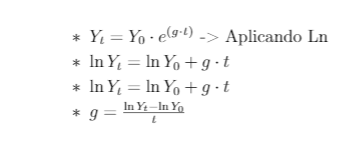

In [51]:
#Y=Tx média de cres. do PIB per capita (1952-2007)
# X=PIB per capita (1952)
# 1) Criando datasets por ano
# 2) renomeando colunas
# 3) Resetando index
# 4) Excluíndo coluna desnecessária

gapminder_2007=gapminder[gapminder['year']==2007]
gapminder_1952=gapminder[gapminder['year']==1952]

gapminder_2007 = gapminder_2007.rename(columns={'country': 'country2007', 'continent': 'continent2007', 'year': 'year2007','lifeExp': 'lifeExp2007', 'pop': 'pop2007', 'gdpPercap': 'gdpPercap2007'})
gapminder_1952 = gapminder_1952.rename(columns={'country': 'country1952', 'continent': 'continent1952', 'year': 'year1952','lifeExp': 'lifeExp1952', 'pop': 'pop1952', 'gdpPercap': 'gdpPercap1952'})

gapminder_2007.reset_index(inplace=True)
gapminder_1952.reset_index(inplace=True)

gapminder_2007.drop('index',axis=1,inplace=True)
gapminder_1952.drop('index',axis=1,inplace=True)

In [52]:
# Unindo os datasets 2007-1952
gapminder2=gapminder_2007.join(gapminder_1952)

In [53]:
# 1) Criando nova coluna
# 2) Normalizando a variável 'gdpPercap1952' para plotagem do gráfico

gapminder2['tx_md']=(np.log(gapminder2['gdpPercap2007'])-np.log(gapminder2['gdpPercap1952']))/(2007-1952)
gapminder2['gdpPercap1952_log']=np.log(gapminder2['gdpPercap1952'])

# Gráfico dos países

In [54]:
import  plotly.express  as  px

fig  =  px.scatter(gapminder2 ,
                   x = 'gdpPercap1952_log',
                   y = 'tx_md',
                   trendline='ols',
                   trendline_color_override='darkblue') 
fig . show ()

# Gráfico de todos continentes

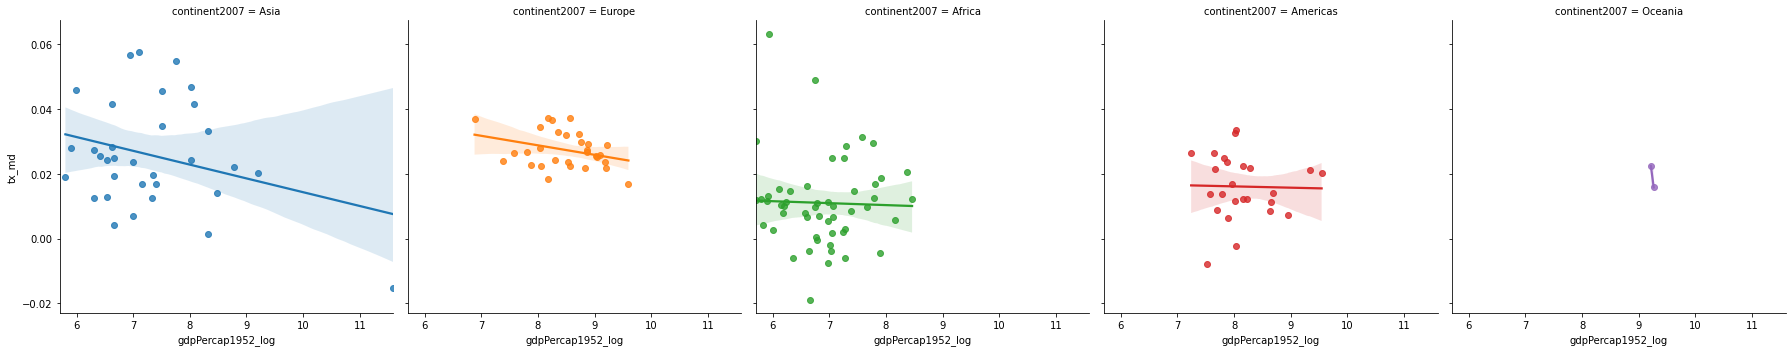

In [55]:
sns.lmplot(x="gdpPercap1952_log", y="tx_md", col="continent2007", hue="continent2007", data=gapminder2)

## Expectativa de vida por Ano

In [56]:
import plotly.express as px
df = px.data.gapminder()
fig = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20,80])
fig.show()

In [57]:
import statsmodels.api as sm
 
## Target is lifeExp
X_train = gapminder[['gdpPercap','pop']].values
y_train = gapminder['lifeExp'].values

X_train = sm.add_constant(X_train)

 
reg = sm.OLS(y_train, X_train).fit()

# mostrando as estatísticas do modelo
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     452.2
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          3.36e-158
Time:                        20:24:03   Log-Likelihood:                -6413.9
No. Observations:                1704   AIC:                         1.283e+04
Df Residuals:                    1701   BIC:                         1.285e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.6482      0.322    166.362      0.0